<a href="https://colab.research.google.com/github/adnanfathoni88/Big-Data/blob/main/02_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Adnan Fathoni <br>
Kelas : IF05 <br>
NIM : 24.21.1591


# IMPORT DATA


In [5]:
# import library
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/KULIAH/2024/BIG DATA/dataset/Global_AI_Content_Impact_Dataset.csv');
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     200 non-null    object 
 1   Year                                        200 non-null    int64  
 2   Industry                                    200 non-null    object 
 3   AI Adoption Rate (%)                        200 non-null    float64
 4   AI-Generated Content Volume (TBs per year)  200 non-null    float64
 5   Job Loss Due to AI (%)                      200 non-null    float64
 6   Revenue Increase Due to AI (%)              200 non-null    float64
 7   Human-AI Collaboration Rate (%)             200 non-null    float64
 8   Top AI Tools Used                           200 non-null    object 
 9   Regulation Status                           200 non-null    object 
 10  Consumer Trust

# 1. EDA : Null

In [6]:
# check NULL
df.isnull().sum()

,0
Country,0
Year,0
Industry,0
AI Adoption Rate (%),0
AI-Generated Content Volume (TBs per year),0
Job Loss Due to AI (%),0
Revenue Increase Due to AI (%),0
Human-AI Collaboration Rate (%),0
Top AI Tools Used,0
Regulation Status,0


In [29]:
# isNull Loss Due to AI
print("data Y: ")
if df['Job Loss Due to AI (%)'].isnull().any():
    print("Ada data NULL di kolom 'Job Loss Due to AI'")
else:
    print("Tidak ada data NULL di kolom 'Job Loss Due to AI'")


print("\ndata X: ")
if df['Human-AI Collaboration Rate (%)'].isnull().any():
    print("Ada data NULL di kolom 'Human-AI Collaboration Rate (%)'")
else:
    print("Tidak ada data NULL di kolom 'Human-AI Collaboration Rate (%)'")

if df['AI Adoption Rate (%)'].isnull().any():
    print("Ada data NULL di kolom 'AI Adoption Rate (%)'")
else:
    print("Tidak ada data NULL di kolom 'AI Adoption Rate (%)'")

if df['Revenue Increase Due to AI (%)'].isnull().any():
    print("Ada data NULL di kolom 'Revenue Increase Due to AI (%)	'")
else:
    print("Tidak ada data NULL di kolom 'Revenue Increase Due to AI (%)	'")

data Y: 
Tidak ada data NULL di kolom 'Job Loss Due to AI'

data X: 
Tidak ada data NULL di kolom 'Human-AI Collaboration Rate (%)'
Tidak ada data NULL di kolom 'AI Adoption Rate (%)'
Tidak ada data NULL di kolom 'Revenue Increase Due to AI (%)	'


# 2. EDA DUPLICATE


In [15]:
# check data duplicate
print(df.duplicated().sum())

if df.duplicated().any():
    print("Ada data duplicate")

    # remove data
    df_no_duplicate = df.drop_duplicates()
    print(df_no_duplicate.duplicated().sum())

else:
    print("Tidak ada data duplicate")

0
Tidak ada data duplicate


# 3. EDA outliner

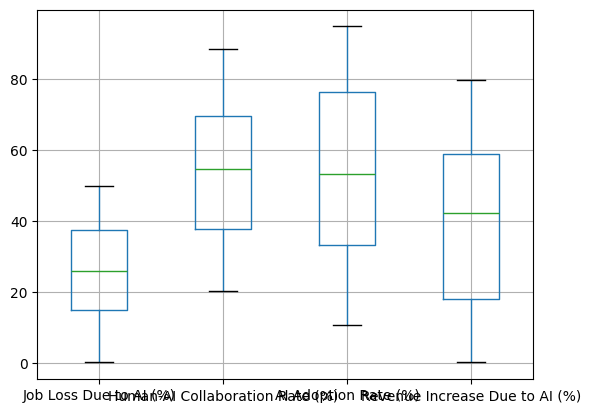

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     200 non-null    object 
 1   Year                                        200 non-null    int64  
 2   Industry                                    200 non-null    object 
 3   AI Adoption Rate (%)                        200 non-null    float64
 4   AI-Generated Content Volume (TBs per year)  200 non-null    float64
 5   Job Loss Due to AI (%)                      200 non-null    float64
 6   Revenue Increase Due to AI (%)              200 non-null    float64
 7   Human-AI Collaboration Rate (%)             200 non-null    float64
 8   Top AI Tools Used                           200 non-null    object 
 9   Regulation Status                           200 non-null    object 
 10  Consumer Trust

In [23]:
import matplotlib.pyplot as plt

# check isOutliner use plt
df.boxplot(column=['Job Loss Due to AI (%)', 'Human-AI Collaboration Rate (%)', 'AI Adoption Rate (%)', 'Revenue Increase Due to AI (%)'])
plt.show()

# delete outliner
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    df_out = df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]
    return df_out

df_no_outliners = df.copy()
for column in ['Job Loss Due to AI (%)', 'Human-AI Collaboration Rate (%)', 'AI Adoption Rate (%)', 'Revenue Increase Due to AI (%)']:
    df_no_outliners = remove_outliers(df_no_outliners, column)

df_no_outliners.info()

#4. Visualisasi

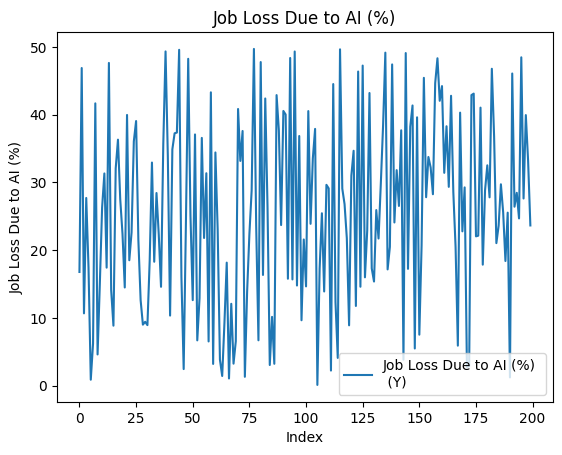

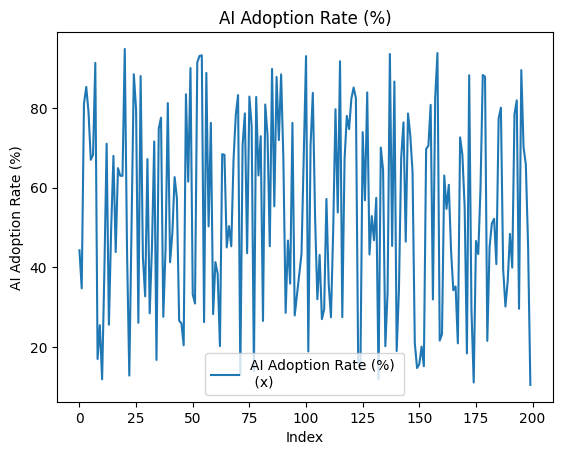

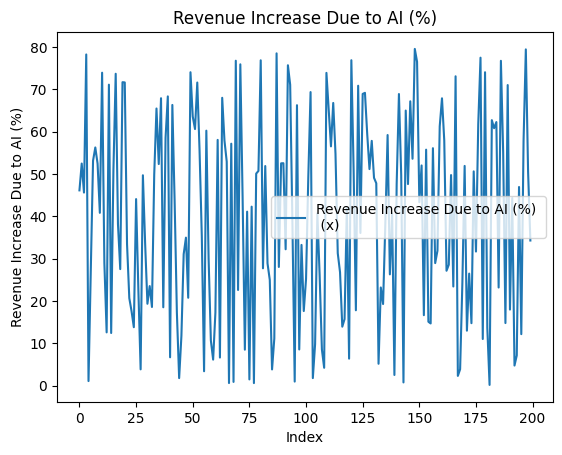

In [27]:
import matplotlib.pyplot as plt

# Job Loss Due to AI (%)
plt.plot(df['Job Loss Due to AI (%)'], label='Job Loss Due to AI (%) \n (Y)')
plt.title('Job Loss Due to AI (%)')
plt.ylabel('Job Loss Due to AI (%)')
plt.xlabel('Index')
plt.legend()
plt.show()

# AI Adoption Rate (%)
plt.plot(df['AI Adoption Rate (%)'], label='AI Adoption Rate (%) \n (x)')
plt.title('AI Adoption Rate (%)')
plt.ylabel('AI Adoption Rate (%)')
plt.xlabel('Index')
plt.legend()
plt.show()

# Revenue Increase Due to AI (%)
plt.plot(df['Revenue Increase Due to AI (%)'], label='Revenue Increase Due to AI (%) \n (x)')
plt.title('Revenue Increase Due to AI (%)')
plt.ylabel('Revenue Increase Due to AI (%)')
plt.xlabel('Index')
plt.legend()

# 5. describe


In [31]:
df.describe()

,Year,AI Adoption Rate (%),AI-Generated Content Volume (TBs per year),Job Loss Due to AI (%),Revenue Increase Due to AI (%),Human-AI Collaboration Rate (%),Consumer Trust in AI (%),Market Share of AI Companies (%)
count,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,2022.315000,54.265850,46.07260,25.788250,39.719450,54.102150,59.425150,26.569550
std,1.825496,24.218067,29.16122,13.901105,23.829545,19.247079,17.319668,14.023729
min,2020.000000,10.530000,1.04000,0.090000,0.140000,20.210000,30.120000,1.180000
25%,2021.000000,33.222500,20.32250,14.995000,17.907500,37.770000,44.755000,14.052500
50%,2022.000000,53.310000,44.32000,25.735000,42.100000,54.515000,59.215000,27.390000
75%,2024.000000,76.220000,71.62000,37.417500,58.697500,69.402500,74.885000,38.432500
max,2025.000000,94.760000,99.06000,49.710000,79.550000,88.290000,89.880000,49.280000
